# PhilReinholdPygrape tutorial 2: State transfer

This notebook is based on the original examples written by Phil,
they can be found in [this directory](https://github.com/tesla-cat/yarn/tree/master/examplesFromForkedLibraries/PhilReinholdPygrape).
Specifically, it contains the following: 

- `pi_pulse_state_transfer.py`

Ruiqi, 27 Jun 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from yarn.PhilReinholdPygrape import (
    run_grape, StateTransferSetup, plot, 
)
from yarn.qutipHelpers import (
    plotWigners, plotWignersIntermediateStates, 
    plotOccupations, plotOccupationsIntermediateStates,
    plotExpectation, cat
)

## parameters

In [2]:
dim = 5
anharmonicity = 0.4

## ladder operators

In [3]:
a = destroy(dim)
ad = a.dag()
numberOperator = ad * a 

## drift Hamiltonian

In [4]:
Hdrift = (anharmonicity/2) * ad * ad * a * a

## control Hamiltonian

In [5]:
X =     a + ad
Y = 1j*(a - ad)
HcontrolList = [X, Y]

## initial and target states

cat state

In [7]:
initStates = [fock(dim, 0)]
targetStates = [cat(dim, 1)]

## define the grape setup

In [8]:
setup = StateTransferSetup(
    Hdrift, HcontrolList, initStates, targetStates
)

## define the initial control sequence

In [9]:
initControls = 1e-3 * np.ones((len(HcontrolList), 200))

## run grape

In [10]:
import warnings; warnings.filterwarnings('ignore')

result = run_grape(initControls, setup, dt=.2)

0 - Fids: 0.8000529 1 - Fids: 0.8000529 2 - Fids: 0.1269074 3 - Fids: 0.8002735 4 - Fids: 0.8004183 5 - Fids: 0.8004606 6 - Fids: 0.8007449 7 - Fids: 0.8036907 8 - Fids: 0.8381543 9 - Fids: 0.6711604 10 - Fids: 0.8670553 11 - Fids: 0.878589 12 - Fids: 0.1152488 13 - Fids: 0.8395286 14 - Fids: 0.8786279 15 - Fids: 0.8819946 16 - Fids: 0.8949497 17 - Fids: 0.9372173 18 - Fids: 0.9772015 19 - Fids: 0.9810578 20 - Fids: 0.9832409 21 - Fids: 0.983881 22 - Fids: 0.9856844 23 - Fids: 0.9901211 24 - Fids: 0.9929092 25 - Fids: 0.9972652 26 - Fids: 0.9984902 27 - Fids: 0.998823 28 - Fids: 0.9993986 29 - Fids: 0.9999351 30 - Fids: 0.999979 31 - Fids: 0.9999986 32 - Fids: 0.9999999 33 - Fids: 0.9999998 34 - Fids: 1 35 - Fids: 1 36 - Fids: 1 

## plot

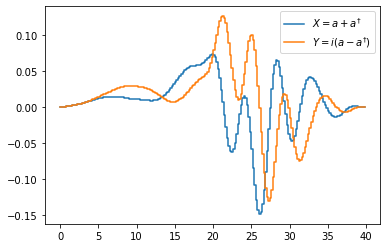

In [11]:
plot(result, ctrlNames=[r'$X=a+a^{\dagger}$',r'$Y=i(a-a^{\dagger})$'])

## evaluate the resulting pulse using qutip

In [12]:
Ht = [list(a) for a in zip(HcontrolList, result.controls)]
Ht.append(Hdrift)
psi0 = initStates[0]
time = result.ts

mesolveResult = mesolve(Ht,psi0,time,[],[])

## plot `qutip.mesolve` results  

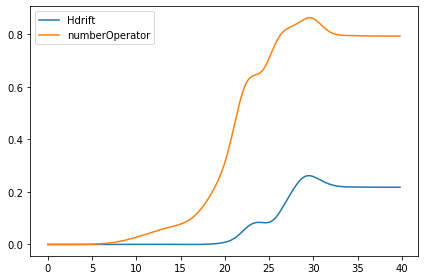

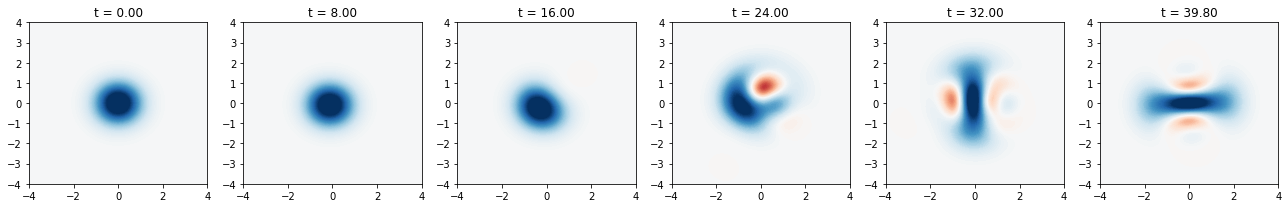

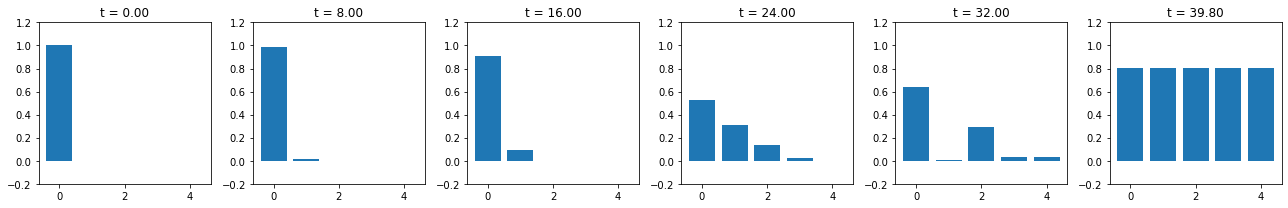

In [13]:
observables = [{'Hdrift':Hdrift, 'numberOperator':numberOperator}]
plotExpectation(time,observables,mesolveResult)
plotWignersIntermediateStates(time,mesolveResult,number=6,radius=4)
plotOccupationsIntermediateStates(time,mesolveResult,number=6)